In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statistics as stats
import pandas as pd
import numpy as np

## WITHOUT NORMALIZING

In [2]:
col=['Subject','AWI ba', 'AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
df=pd.read_csv('AWI.csv', names=col)
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-8.506600e-19,5.623596e-20,-2.615682e-19,-1.078018e-16,-6.597268e-20,-6.892238e-19,-1.953512e-19
1,6401,-2.570211e-21,-6.668257e-20,-7.316580e-20,-5.155080e-20,-4.385007e-20,1.109287e-17,3.209470e-21
2,656,-3.505084e-22,9.340243e-23,1.994450e-23,2.690796e-23,1.017428e-22,9.974161e-23,1.837602e-23
3,1702,6.548116e-23,-8.395530e-24,-2.107514e-23,-2.038772e-23,3.337296e-23,5.950773e-24,-4.853892e-24
4,2900,3.876989e-20,-2.539944e-23,-1.183526e-22,1.431018e-20,1.911365e-22,1.136192e-21,-2.781208e-20


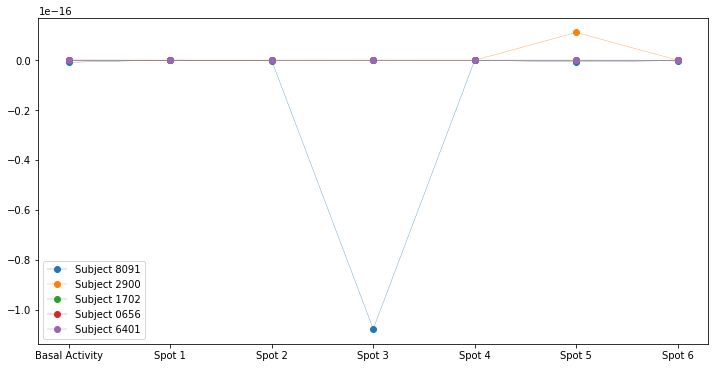

In [3]:
suj_8091=np.ravel(df.iloc[0:1,1:])
suj_2900=np.ravel(df.iloc[1:2,1:])
suj_1702=np.ravel(df.iloc[2:3,1:])
suj_0656=np.ravel(df.iloc[3:4,1:])
suj_6401=np.ravel(df.iloc[4:5,1:])

plt.figure(figsize=(12,6))
plt.plot(suj_8091, marker='o',lw=0.3,label='Subject 8091')
plt.plot(suj_2900, marker='o',lw=0.3,label='Subject 2900')
plt.plot(suj_1702, marker='o',lw=0.3,label='Subject 1702')
plt.plot(suj_0656, marker='o',lw=0.3,label='Subject 0656')
plt.plot(suj_6401, marker='o',lw=0.3,label='Subject 6401')
plt.plot()
labels = ['Basal Activity','Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.legend(loc='best')
plt.show()

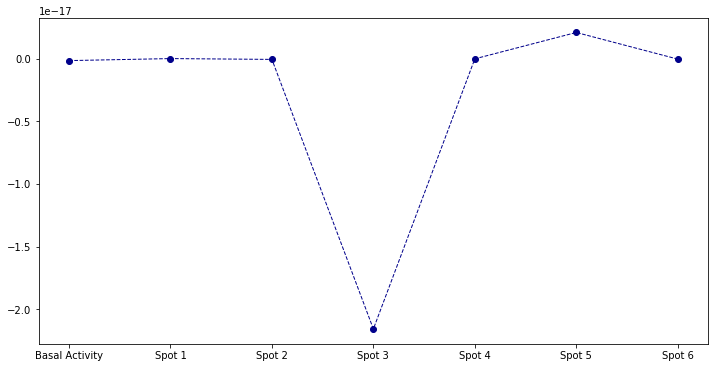

In [4]:
AWI_ba=np.ravel(df.iloc[:,1:2])
AWI_sp1=np.ravel(df.iloc[:,2:3])
AWI_sp2=np.ravel(df.iloc[:,3:4])
AWI_sp3=np.ravel(df.iloc[:,4:5])
AWI_sp4=np.ravel(df.iloc[:,5:6])
AWI_sp5=np.ravel(df.iloc[:,6:7])
AWI_sp6=np.ravel(df.iloc[:,7:])

mean_AWI = [stats.mean(AWI_ba), stats.mean(AWI_sp1), stats.mean(AWI_sp2), stats.mean(AWI_sp3), 
            stats.mean(AWI_sp4), stats.mean(AWI_sp5), stats.mean(AWI_sp6)]

labels = ['Basal Activity','Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(12,6))
plt.plot(mean_AWI[:], lw=1,ls='--', c='darkblue', marker='o', ms=6, mfc='darkblue')
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()

In [5]:
mean_AWI

[-1.629490645911241e-19,
 -2.077401969586716e-21,
 -6.697068826182561e-20,
 -2.1567799254807886e-17,
 -2.189929923374688e-20,
 2.0809766432654907e-18,
 -4.398805181066918e-20]

## DIVIDING BY AWI_BA

In [6]:
col=['Subject','AWI ba', 'AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
df=pd.read_csv('AWI.csv', names=col)
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-8.506600e-19,5.623596e-20,-2.615682e-19,-1.078018e-16,-6.597268e-20,-6.892238e-19,-1.953512e-19
1,6401,-2.570211e-21,-6.668257e-20,-7.316580e-20,-5.155080e-20,-4.385007e-20,1.109287e-17,3.209470e-21
2,656,-3.505084e-22,9.340243e-23,1.994450e-23,2.690796e-23,1.017428e-22,9.974161e-23,1.837602e-23
3,1702,6.548116e-23,-8.395530e-24,-2.107514e-23,-2.038772e-23,3.337296e-23,5.950773e-24,-4.853892e-24
4,2900,3.876989e-20,-2.539944e-23,-1.183526e-22,1.431018e-20,1.911365e-22,1.136192e-21,-2.781208e-20


In [7]:
cols_to_norm = ['AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
for i in cols_to_norm:
    df[i]=df[i]/abs(df['AWI ba'])
df['AWI ba']=df['AWI ba']/abs(df['AWI ba'])
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-1.0,0.066109,-0.307488,-126.727207,-0.077555,-0.810222,-0.229647
1,6401,-1.0,-25.944396,-28.466845,-20.057030,-17.060883,4315.935521,1.248718
2,656,-1.0,0.266477,0.056902,0.076768,0.290272,0.284563,0.052427
3,1702,1.0,-0.128213,-0.321850,-0.311352,0.509657,0.090878,-0.074127
4,2900,1.0,-0.000655,-0.003053,0.369105,0.004930,0.029306,-0.717363


In [8]:
df=df.drop(1) #Drop outlier row subject 6401
df=df.replace(df.iloc[0:1,4:5],df['AWI sp3'].median())
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-1.0,0.066109,-0.307488,-0.117292,-0.077555,-0.810222,-0.229647
2,656,-1.0,0.266477,0.056902,0.076768,0.290272,0.284563,0.052427
3,1702,1.0,-0.128213,-0.321850,-0.311352,0.509657,0.090878,-0.074127
4,2900,1.0,-0.000655,-0.003053,0.369105,0.004930,0.029306,-0.717363


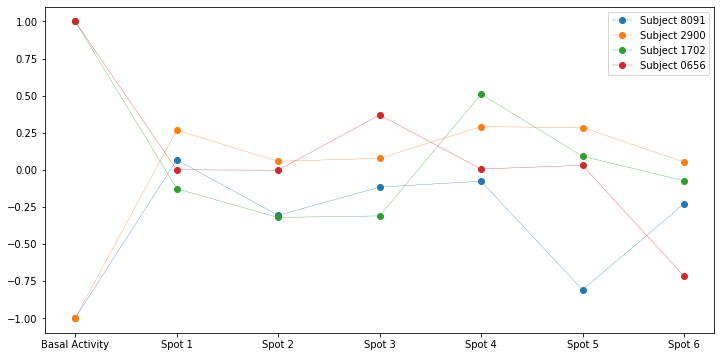

In [9]:
suj_8091=np.ravel(df.iloc[0:1,1:])
suj_2900=np.ravel(df.iloc[1:2,1:])
suj_1702=np.ravel(df.iloc[2:3,1:])
suj_0656=np.ravel(df.iloc[3:4,1:])

plt.figure(figsize=(12,6))
plt.plot(suj_8091, marker='o',lw=0.3,label='Subject 8091')
plt.plot(suj_2900, marker='o',lw=0.3,label='Subject 2900')
plt.plot(suj_1702, marker='o',lw=0.3,label='Subject 1702')
plt.plot(suj_0656, marker='o',lw=0.3,label='Subject 0656')
plt.plot()
labels = ['Basal Activity','Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.legend(loc='best')
plt.show()

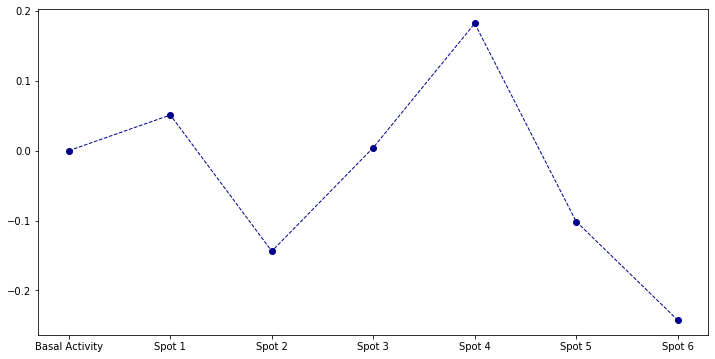

In [10]:
AWI_ba=np.ravel(df.iloc[:,1:2])
AWI_sp1=np.ravel(df.iloc[:,2:3])
AWI_sp2=np.ravel(df.iloc[:,3:4])
AWI_sp3=np.ravel(df.iloc[:,4:5])
AWI_sp4=np.ravel(df.iloc[:,5:6])
AWI_sp5=np.ravel(df.iloc[:,6:7])
AWI_sp6=np.ravel(df.iloc[:,7:])

mean_AWI = [stats.mean(AWI_ba), stats.mean(AWI_sp1), stats.mean(AWI_sp2), stats.mean(AWI_sp3), 
            stats.mean(AWI_sp4), stats.mean(AWI_sp5), stats.mean(AWI_sp6)]

labels = ['Basal Activity','Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(12,6))
plt.plot(mean_AWI[:], lw=1,ls='--', c='darkblue', marker='o', ms=6, mfc='darkblue')
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()

In [11]:
mean_AWI

[0.0,
 0.05092940711256181,
 -0.14387248118270102,
 0.0043073447210389415,
 0.18182620742274358,
 -0.10136900931747883,
 -0.24217728997452978]

## MINMAX SCALER 

In [12]:
col=['Subject','AWI ba', 'AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
df=pd.read_csv('AWI.csv', names=col)
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-8.506600e-19,5.623596e-20,-2.615682e-19,-1.078018e-16,-6.597268e-20,-6.892238e-19,-1.953512e-19
1,6401,-2.570211e-21,-6.668257e-20,-7.316580e-20,-5.155080e-20,-4.385007e-20,1.109287e-17,3.209470e-21
2,656,-3.505084e-22,9.340243e-23,1.994450e-23,2.690796e-23,1.017428e-22,9.974161e-23,1.837602e-23
3,1702,6.548116e-23,-8.395530e-24,-2.107514e-23,-2.038772e-23,3.337296e-23,5.950773e-24,-4.853892e-24
4,2900,3.876989e-20,-2.539944e-23,-1.183526e-22,1.431018e-20,1.911365e-22,1.136192e-21,-2.781208e-20


In [13]:
cols_to_norm = ['AWI ba','AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
df[cols_to_norm] = (preprocessing.MinMaxScaler().fit_transform(df[cols_to_norm].T)).T
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,0.991592,1.000000,0.997053,0.000000,0.998867,0.993089,0.997667
1,6401,0.006322,0.000581,0.000000,0.001936,0.002625,1.000000,0.006840
2,656,0.000000,0.981558,0.819131,0.834528,1.000000,0.995575,0.815663
3,1702,1.000000,0.146490,0.000000,0.007942,0.629048,0.312235,0.187407
4,2900,1.000000,0.417330,0.415934,0.632638,0.420583,0.434776,0.000000


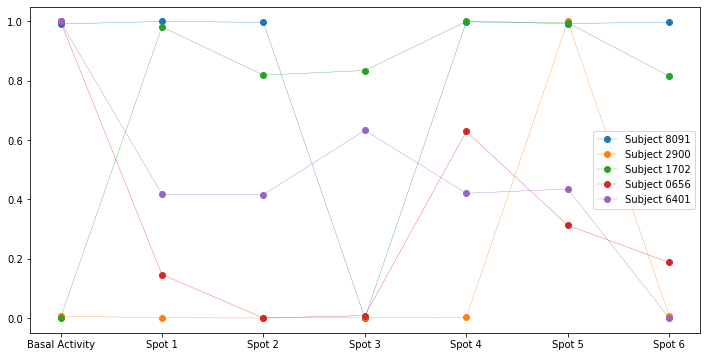

In [14]:
suj_8091=np.ravel(df.iloc[0:1,1:])
suj_2900=np.ravel(df.iloc[1:2,1:])
suj_1702=np.ravel(df.iloc[2:3,1:])
suj_0656=np.ravel(df.iloc[3:4,1:])
suj_6401=np.ravel(df.iloc[4:5,1:])

plt.figure(figsize=(12,6))
plt.plot(suj_8091, marker='o',lw=0.3,label='Subject 8091')
plt.plot(suj_2900, marker='o',lw=0.3,label='Subject 2900')
plt.plot(suj_1702, marker='o',lw=0.3,label='Subject 1702')
plt.plot(suj_0656, marker='o',lw=0.3,label='Subject 0656')
plt.plot(suj_6401, marker='o',lw=0.3,label='Subject 6401')
plt.plot()
labels = ['Basal Activity','Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.legend(loc='best')
plt.show()

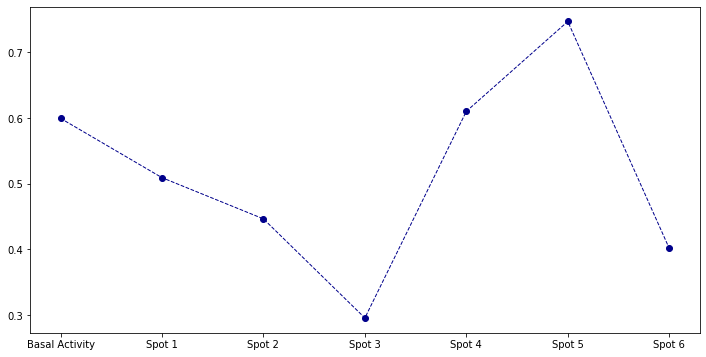

In [15]:
AWI_ba=np.ravel(df.iloc[:,1:2])
AWI_sp1=np.ravel(df.iloc[:,2:3])
AWI_sp2=np.ravel(df.iloc[:,3:4])
AWI_sp3=np.ravel(df.iloc[:,4:5])
AWI_sp4=np.ravel(df.iloc[:,5:6])
AWI_sp5=np.ravel(df.iloc[:,6:7])
AWI_sp6=np.ravel(df.iloc[:,7:])

mean_AWI = [stats.mean(AWI_ba), stats.mean(AWI_sp1), stats.mean(AWI_sp2), stats.mean(AWI_sp3), 
            stats.mean(AWI_sp4), stats.mean(AWI_sp5), stats.mean(AWI_sp6)]

labels = ['Basal Activity','Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(12,6))
plt.plot(mean_AWI[:], lw=1,ls='--', c='darkblue', marker='o', ms=6, mfc='darkblue')
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()

In [16]:
mean_AWI

[0.5995828225833718,
 0.5091917619043348,
 0.4464237235855477,
 0.2954086733835465,
 0.610224653298766,
 0.7471350037017154,
 0.40151538132696735]